In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read csv
df_original = pd.read_csv("G:\\DIY Guru\\Others\\smart_ev_energy_logs_dirty.csv")
#print(len(df_original)) #510

#copy to another df
df = df_original.copy() #.sort_values(by=['Timestamp'], ascending=False).head(100)
#print(df.to_string())

#identify duplicates
df_dup = df.duplicated()
#print(df[df_dup].to_string())
#print(len(df[df_dup])) #5

df = df.drop_duplicates()
#print(df.to_string())
#print(len(df)) #505

df_invalid = df[df.isna().any(axis=1)]
#print(df_invalid.to_string())
#print(len(df_invalid)) #10

df_drop = df.dropna()
#print(df_drop)
#print(len(df_drop)) #495

df = df.fillna({'Average_Speed_kmph' : df['Average_Speed_kmph'].mean(),
                'Energy_Consumption_kWh' : df['Energy_Consumption_kWh'].median(),
                'Battery_Health_%' : df['Battery_Health_%'].min()})

if df_original.isnull().any().any():
  print('Original df: There are still missing values')
else:
  print('Original df: Data is cleaned')

if df_drop.isnull().any().any():
  print('Dup dropped df: There are still missing values')
else:
  print('Dup dropped df: Data is cleaned')

if df.isnull().any().any():
  print('Fill df:There are still missing values')
else:
  print('Fill df: Data is cleaned')

Original df: There are still missing values
Dup dropped df: Data is cleaned
Fill df: Data is cleaned


In [7]:
print(df.head(5).to_string())

   Trip_ID            Timestamp Driver_ID  Average_Speed_kmph  Trip_Distance_km  Energy_Consumption_kWh  Regenerative_Braking_%  Battery_Health_%  Charging_Time_min  External_Temperature_C  Energy_Efficiency_kWh_per_km
0        1  2024-05-12 06:00:00      D002           36.592411         32.526816                7.153989               47.982924         96.379421          33.391053               18.576495                         0.220
1        2  2024-05-26 03:00:00      D003           63.100342         40.563555                7.095605               60.835885         88.133800          55.609279               24.158908                         0.175
2        3  2024-02-05 20:00:00      D002           54.753244         47.710239                7.752734               61.779438         90.393851          41.993780               25.946497                         0.162
3        4  2024-02-23 22:00:00      D002           28.339507         48.284210                7.068066               59.060

In [8]:
# detecting outliers and applying the median value

df_outlier_clean = df.copy()

def replace_outliers_with_median(df_outlier_clean, column):
    Q1 = df_outlier_clean[column].quantile(0.25)
    Q3 = df_outlier_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    median = df_outlier_clean[column].median()

    df_outlier_clean[column] = df_outlier_clean[column].where(df_outlier_clean[column].between(lower, upper), median)
    return df_outlier_clean

columns = ['Energy_Consumption_kWh', 'Average_Speed_kmph', 'Battery_Health_%', 'Regenerative_Braking_%','Energy_Efficiency_kWh_per_km','External_Temperature_C']
for column in columns:
    df_outlier_clean = replace_outliers_with_median(df_outlier_clean, column)

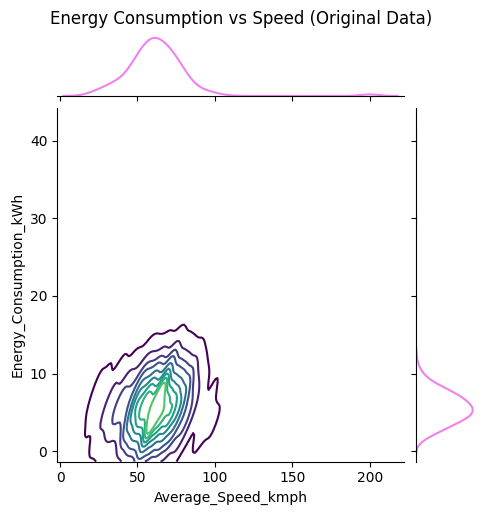

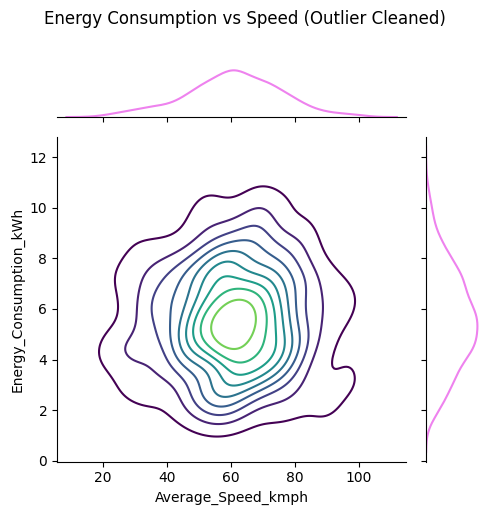

In [9]:
# 1. Jointplot: Energy Consumption vs Average Speed

import seaborn as sns

jointplot_kind = 'kde' #hist,kde,reg
sns.jointplot(data=df, x='Average_Speed_kmph', y='Energy_Consumption_kWh', kind=jointplot_kind, cmap='viridis',color='violet',height=5)
plt.suptitle('Energy Consumption vs Speed (Original Data)\n', y=1.02)


jointplot_kind = 'kde' #hist,kde,reg
sns.jointplot(data=df_outlier_clean, x='Average_Speed_kmph', y='Energy_Consumption_kWh', kind=jointplot_kind, cmap='viridis',color='violet',height=5)
plt.suptitle('Energy Consumption vs Speed (Outlier Cleaned)', y=1.02)

plt.tight_layout()
plt.show()



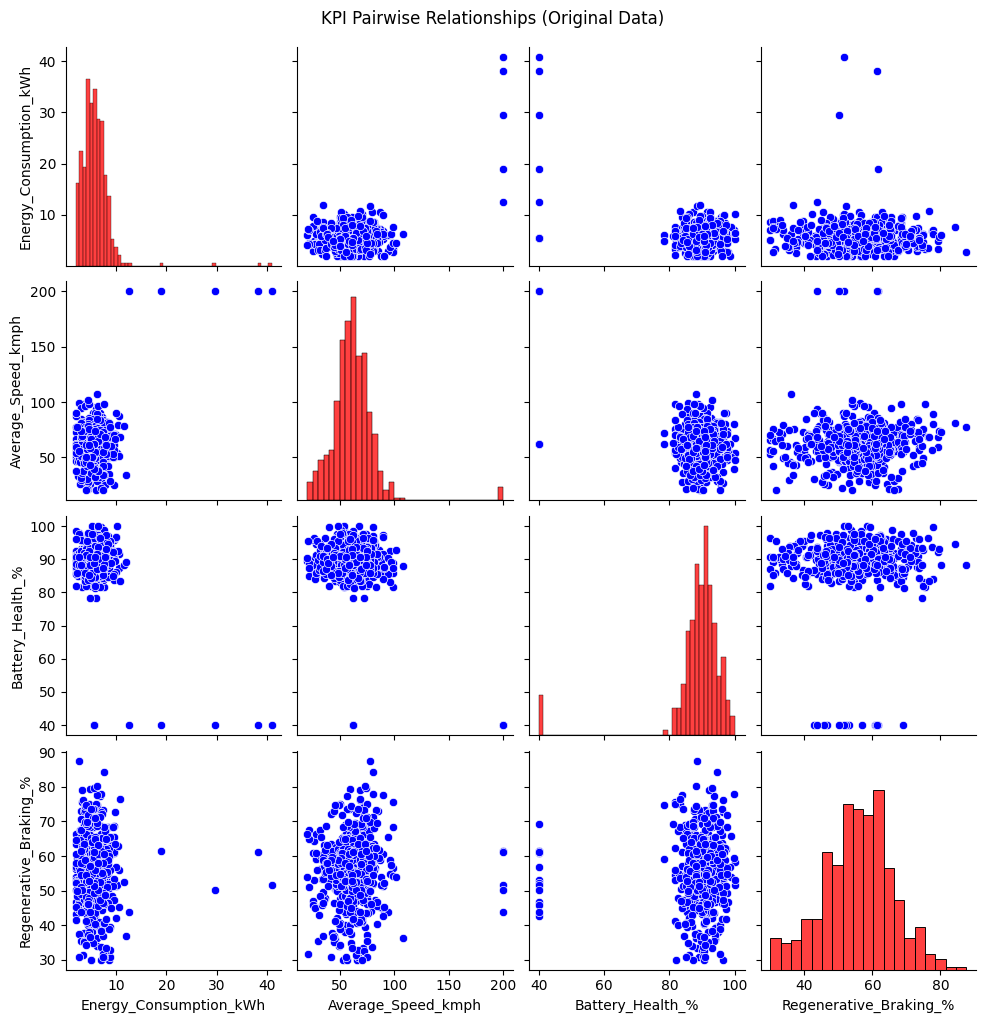

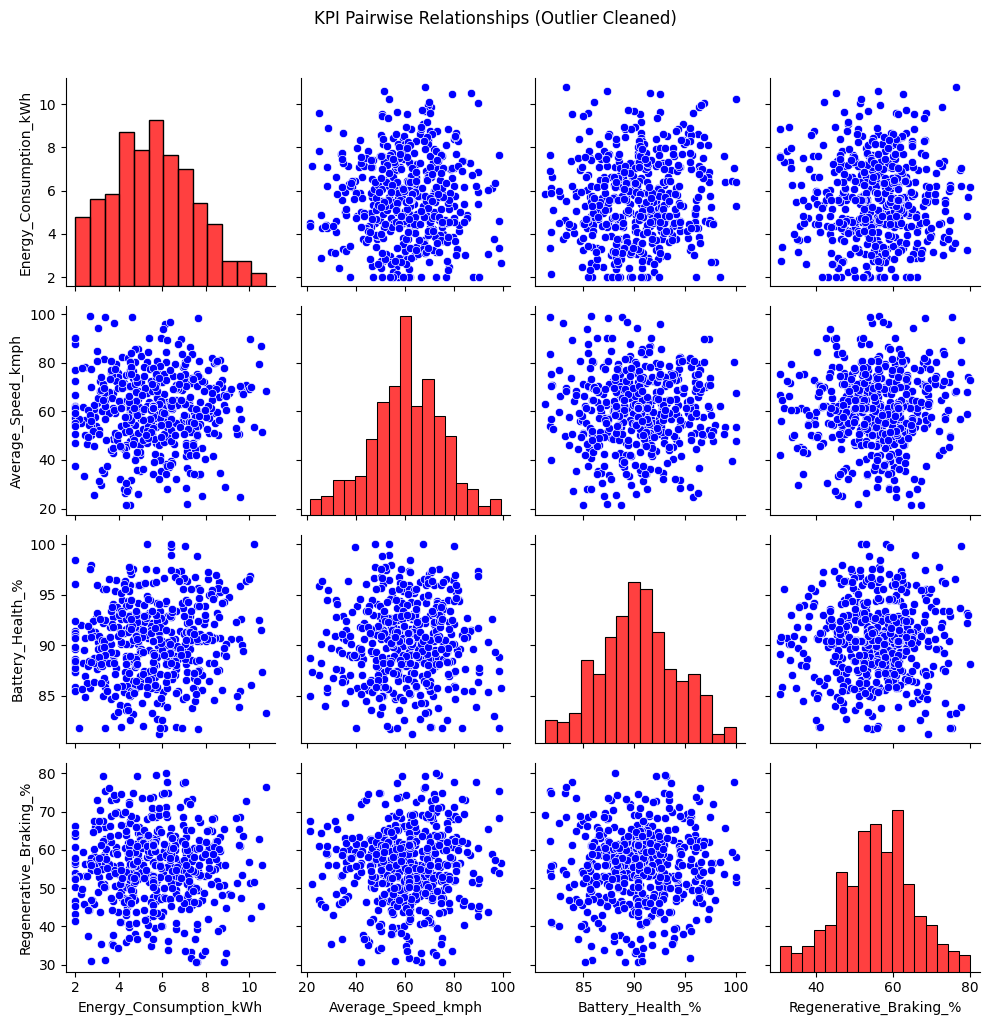

In [10]:
#2. Pairplot for selected KPIs
fig_size = (30, 10)

custom_palette = sns.color_palette("husl", len(df.columns))

sns.pairplot(df[['Energy_Consumption_kWh', 'Average_Speed_kmph', 'Battery_Health_%', 'Regenerative_Braking_%']]
             ,plot_kws={'color': 'blue'}
             ,diag_kws={'color': 'red'}
             ,diag_kind='hist')
plt.suptitle('KPI Pairwise Relationships (Original Data)\n', y=1.02)

sns.pairplot(df_outlier_clean[['Energy_Consumption_kWh', 'Average_Speed_kmph', 'Battery_Health_%', 'Regenerative_Braking_%']]
             ,plot_kws={'color': 'blue'}
             ,diag_kws={'color': 'red'}
             ,diag_kind='hist')
plt.suptitle('KPI Pairwise Relationships (Outlier Cleaned)', y=1.02)
plt.tight_layout()
plt.show()

In [11]:
df_outlier_clean.describe()

,Trip_ID,Average_Speed_kmph,Trip_Distance_km,Energy_Consumption_kWh,Regenerative_Braking_%,Battery_Health_%,Charging_Time_min,External_Temperature_C,Energy_Efficiency_kWh_per_km
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,249.958416,60.840045,30.071655,5.587113,55.744330,90.402839,39.400397,20.250913,0.196651
std,144.319298,14.740363,12.577208,1.910996,9.819853,3.794437,14.311589,7.488335,0.098418
min,1.000000,21.326769,5.000000,2.000000,30.649363,81.223007,15.000000,0.615628,0.039000
25%,125.000000,51.499959,21.555630,4.293155,49.490888,87.950372,29.164559,15.178625,0.128000
50%,249.000000,61.531934,30.343161,5.555903,56.134690,90.371430,38.886300,20.005681,0.188000
75%,375.000000,70.347949,38.795702,6.993120,61.779438,92.863810,49.545486,25.446126,0.244000
max,500.000000,99.250499,67.703604,10.765849,80.237998,100.000000,81.260845,40.195172,0.512000


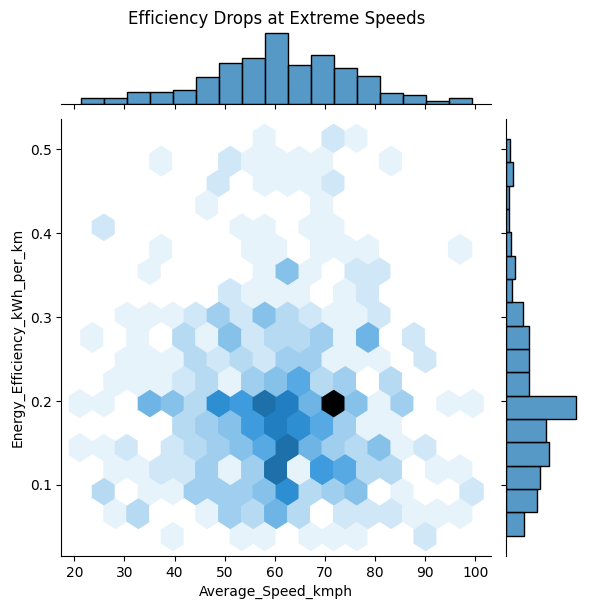

In [12]:
#Efficiency

sns.jointplot(data=df_outlier_clean, x='Average_Speed_kmph', y='Energy_Efficiency_kWh_per_km', kind='hex')
plt.title("Efficiency Drops at Extreme Speeds", y=1.2)
plt.show()

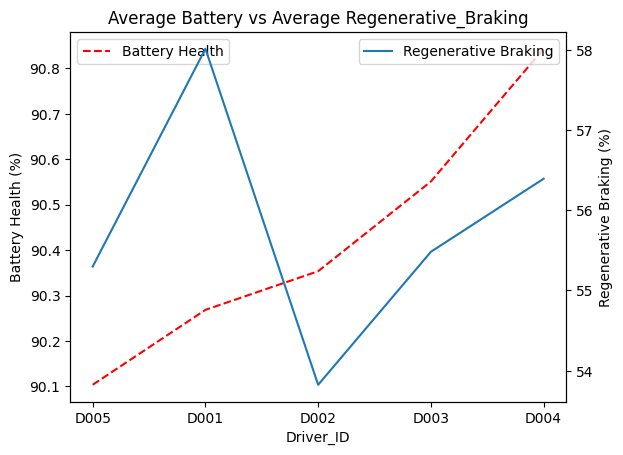

In [13]:
#Average Battery Health

battery_health = df_outlier_clean.groupby('Driver_ID')['Battery_Health_%'].mean().sort_values()
ax1 = sns.lineplot(battery_health,linestyle='--',color='red', label='Battery Health')
plt.ylabel('Battery Health (%)')

ax2 = ax1.twinx()
regenerative_braking = df_outlier_clean.groupby('Driver_ID')['Regenerative_Braking_%'].mean().sort_values()
sns.lineplot(regenerative_braking,linestyle='-',ax=ax2, label='Regenerative Braking')
plt.ylabel('Regenerative Braking (%)')
plt.title("Average Battery vs Average Regenerative_Braking")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12500\1357386021.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = df_outlier_clean.groupby('Temp_Bin')['Energy_Efficiency_kWh_per_km'].mean()
C:\Users\DELL\AppData\Local\Temp\ipykernel_12500\1357386021.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


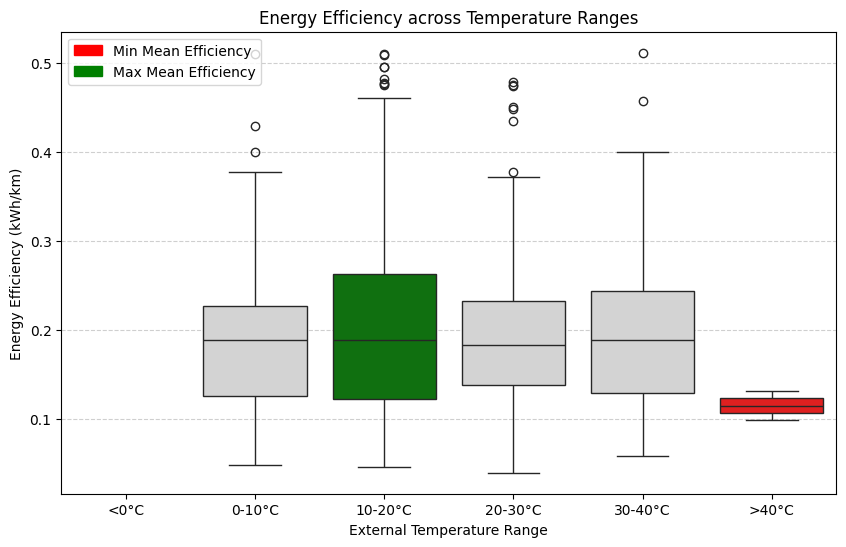

In [14]:
#Battery Health by Temperature Ranges (Binning)

import matplotlib.patches as mpatches

df_outlier_clean['Temp_Bin'] = pd.cut(df_outlier_clean['External_Temperature_C'], bins=[-10, 0, 10, 20, 30, 40, 50],
                        labels=['<0°C', '0-10°C', '10-20°C', '20-30°C', '30-40°C', '>40°C'],
                        )

group_means = df_outlier_clean.groupby('Temp_Bin')['Energy_Efficiency_kWh_per_km'].mean()

min_bin = group_means.idxmin()
max_bin = group_means.idxmax()

default_color = "lightgray"
highlight_colors = {
    min_bin: "red",
    max_bin: "green"
}

colors = [highlight_colors.get(cat, default_color) for cat in df_outlier_clean['Temp_Bin'].cat.categories]

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Temp_Bin',
    y='Energy_Efficiency_kWh_per_km',
    data=df_outlier_clean,
    palette=colors,
    legend=False
)
plt.title('Energy Efficiency across Temperature Ranges')
plt.xlabel('External Temperature Range')
plt.ylabel('Energy Efficiency (kWh/km)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

red_patch = mpatches.Patch(color='red', label='Min Mean Efficiency')
green_patch = mpatches.Patch(color='green', label='Max Mean Efficiency')
plt.legend(handles=[red_patch, green_patch],loc='upper left')

plt.show()